## Affichage

In [ ]:
! python --version

In [22]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
sys.path.append('/Applications/CPLEX_Studio221/cplex/python/3.7/x86-64_osx/cplex/_internal')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/src')
sys.path.append('/Users/xinyuhuangmac/Google Drive/Stage/code_pb_ve/data')
import py37_cplex2210 as cplex
from generator import *

In [45]:
%reload_ext autoreload
%autoreload 2
from frontal_algo import *
from Frank_Wolfe_ev import *
from Frank_Wolfe_st import *
from tools import *
K=100
nk=20

In [4]:
np.random.seed(0)
N=20
instance_json(N)
my_instance = "../data/instance_" + str(N) + ".json"
stochastic = Frank_Wolfe_Stochastic(my_instance)

In [33]:
np.random.seed(0)
x_bar_k,df=stochastic.FW_solve(actual_time, analyse=True, K=K, nk=nk)

100%|██████████| 100/100 [00:30<00:00,  3.30iteration/s]

Gap primal dual :  3445597.458608018
Objective value is :  155472.01469892263


In [6]:
stochastic.affichage(x_bar_k)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 6138.0 	 0.0 	 7000.0 	 -862.0
1 	 10730.0 	 4500.0 	 7000.0 	 -770.0
2 	 6750.0 	 0.0 	 7000.0 	 -250.0
3 	 7500.0 	 1500.0 	 7000.0 	 -1000.0
4 	 6136.0 	 0.0 	 7000.0 	 -864.0
5 	 3070.0 	 -3000.0 	 7000.0 	 -930.0
6 	 3000.0 	 -3000.0 	 7000.0 	 -1000.0
7 	 3000.0 	 -3000.0 	 7000.0 	 -1000.0
8 	 -185.0 	 -6750.0 	 7000.0 	 -435.0
9 	 4500.0 	 -1500.0 	 7000.0 	 -1000.0
------------------------------------------------------
f_val: 71994.5447103064 neg_pos_part: 11.346463547452052 cost_electricity: 1265.966873980195 soc: 82200.15665108858
value of the objective function: 155472.01469892263
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 21140.41042419181 	
S_i_min: [    0.             0.             0.  

In [11]:
np.random.seed(0)
frontal = Frontal(my_instance,actual_time)

In [12]:
result,s_t_min,soc_max = frontal.Frontal_solve(actual_time)

Minimize
obj1: - 0.5 s_bl_0_10 + 0.00125 c_bl_0_1 + 0.00125 c_bl_0_2 + 0.00125 c_bl_0_3
+ 0.00125 c_bl_0_4 + 0.00125 c_bl_0_5 + 0.00125 c_bl_0_6
+ 0.00125 c_bl_0_7 + 0.00125 c_bl_0_8 + 0.00125 c_bl_0_9
+ 0.00125 c_bl_0_10 - 0.00125 d_bl_0_1 - 0.00125 d_bl_0_2
- 0.00125 d_bl_0_3 - 0.00125 d_bl_0_4 - 0.00125 d_bl_0_5
- 0.00125 d_bl_0_6 - 0.00125 d_bl_0_7 - 0.00125 d_bl_0_8
- 0.00125 d_bl_0_9 - 0.00125 d_bl_0_10 - 0.5 s_bl_1_10
+ 0.00125 c_bl_1_1 + 0.00125 c_bl_1_2 + 0.00125 c_bl_1_3
+ 0.00125 c_bl_1_4 + 0.00125 c_bl_1_5 + 0.00125 c_bl_1_6
+ 0.00125 c_bl_1_7 + 0.00125 c_bl_1_8 + 0.00125 c_bl_1_9
+ 0.00125 c_bl_1_10 - 0.00125 d_bl_1_1 - 0.00125 d_bl_1_2
- 0.00125 d_bl_1_3 - 0.00125 d_bl_1_4 - 0.00125 d_bl_1_5
- 0.00125 d_bl_1_6 - 0.00125 d_bl_1_7 - 0.00125 d_bl_1_8
- 0.00125 d_bl_1_9 - 0.00125 d_bl_1_10 - 0.5 s_bl_2_10
+ 0.00125 c_bl_2_1 + 0.00125 c_bl_2_2 + 0.00125 c_bl_2_3
+ 0.00125 c_bl_2_4 + 0.00125 c_bl_2_5 + 0.00125 c_bl_2_6
+ 0.00125 c_bl_2_7 + 0.00125 c_bl_2_8 + 0.00125 c_bl_2_9
+ 

In [13]:
frontal.affichage(result)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 6260.0 	 -740.0 	 7000.0 	 0.0
1 	 10750.0 	 3750.0 	 7000.0 	 0.0
2 	 2573.0 	 -4427.0 	 7000.0 	 0.0
3 	 7750.0 	 750.0 	 7000.0 	 0.0
4 	 10449.0 	 3449.0 	 7000.0 	 0.0
5 	 9384.0 	 2384.0 	 7000.0 	 0.0
6 	 12000.0 	 5000.0 	 7000.0 	 0.0
7 	 3000.0 	 -4000.0 	 7000.0 	 0.0
8 	 10603.0 	 3603.0 	 7000.0 	 0.0
9 	 10750.0 	 3750.0 	 7000.0 	 0.0
------------------------------------------------------
f_val: 7.444625512977249e-26 neg_pos_part: 0.0 cost_electricity: 2087.9684404910804 soc: 0.0
value of the objective function: 2087.9684404910804
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 30000.0 	
S_i_min: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2390.4198913338514, 6140.419891333851, 9890.419891333851, 13640.41

In [46]:
np.random.seed(0)
standard = Frank_Wolfe_Standard(my_instance)

In [47]:
np.random.seed(0)
x_bar_k_1,df_1=standard.FW_st_solve(actual_time, analyse=True, K=K, nk=nk)

100%|██████████| 100/100 [00:20<00:00,  4.93iteration/s]

Gap primal dual :  148773.62316647236
Objective value is :  117692.15500149736


In [48]:
standard.affichage(x_bar_k_1)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 4583.0 	 -2499.0 	 7000.0 	 83.0
1 	 5633.0 	 -1670.0 	 7000.0 	 303.0
2 	 2471.0 	 -4751.0 	 7000.0 	 222.0
3 	 256.0 	 -6799.0 	 7000.0 	 54.0
4 	 4938.0 	 -2223.0 	 7000.0 	 160.0
5 	 5447.0 	 -1657.0 	 7000.0 	 103.0
6 	 5473.0 	 -1830.0 	 7000.0 	 303.0
7 	 5911.0 	 -1393.0 	 7000.0 	 304.0
8 	 -1511.0 	 -8583.0 	 7000.0 	 73.0
9 	 5295.0 	 -1906.0 	 7000.0 	 201.0
------------------------------------------------------
f_val: 4174.370078127929 neg_pos_part: 0.0 cost_electricity: 962.4147386438248 soc: 112555.37018472567
value of the objective function: 117692.15500149743
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 17808.222246022717 	
S_i_min: [    0.             0.             0.             0.
  

In [51]:
np.random.seed(0)
frontal = Frontal(my_instance,actual_time)
result,s_t_min,soc_max= frontal.Frontal_solve(actual_time)

Minimize
obj1: - 0.5 s_bl_0_10 + 0.00125 c_bl_0_1 + 0.00125 c_bl_0_2 + 0.00125 c_bl_0_3
+ 0.00125 c_bl_0_4 + 0.00125 c_bl_0_5 + 0.00125 c_bl_0_6
+ 0.00125 c_bl_0_7 + 0.00125 c_bl_0_8 + 0.00125 c_bl_0_9
+ 0.00125 c_bl_0_10 - 0.00125 d_bl_0_1 - 0.00125 d_bl_0_2
- 0.00125 d_bl_0_3 - 0.00125 d_bl_0_4 - 0.00125 d_bl_0_5
- 0.00125 d_bl_0_6 - 0.00125 d_bl_0_7 - 0.00125 d_bl_0_8
- 0.00125 d_bl_0_9 - 0.00125 d_bl_0_10 - 0.5 s_bl_1_10
+ 0.00125 c_bl_1_1 + 0.00125 c_bl_1_2 + 0.00125 c_bl_1_3
+ 0.00125 c_bl_1_4 + 0.00125 c_bl_1_5 + 0.00125 c_bl_1_6
+ 0.00125 c_bl_1_7 + 0.00125 c_bl_1_8 + 0.00125 c_bl_1_9
+ 0.00125 c_bl_1_10 - 0.00125 d_bl_1_1 - 0.00125 d_bl_1_2
- 0.00125 d_bl_1_3 - 0.00125 d_bl_1_4 - 0.00125 d_bl_1_5
- 0.00125 d_bl_1_6 - 0.00125 d_bl_1_7 - 0.00125 d_bl_1_8
- 0.00125 d_bl_1_9 - 0.00125 d_bl_1_10 - 0.5 s_bl_2_10
+ 0.00125 c_bl_2_1 + 0.00125 c_bl_2_2 + 0.00125 c_bl_2_3
+ 0.00125 c_bl_2_4 + 0.00125 c_bl_2_5 + 0.00125 c_bl_2_6
+ 0.00125 c_bl_2_7 + 0.00125 c_bl_2_8 + 0.00125 c_bl_2_9
+ 

In [52]:
frontal.affichage(result)

alpha: 0.01 Beta_min: 10000 Beta_max: 10000 Gamma: 100
------------------------------------------------------
t	 charge net bl	 charge net up	 y_t^up/N 	 Ecart de Service
0 	 6260.0 	 -740.0 	 7000.0 	 0.0
1 	 10750.0 	 3750.0 	 7000.0 	 0.0
2 	 2573.0 	 -4427.0 	 7000.0 	 0.0
3 	 7750.0 	 750.0 	 7000.0 	 0.0
4 	 10449.0 	 3449.0 	 7000.0 	 0.0
5 	 9384.0 	 2384.0 	 7000.0 	 0.0
6 	 12000.0 	 5000.0 	 7000.0 	 0.0
7 	 3000.0 	 -4000.0 	 7000.0 	 0.0
8 	 10603.0 	 3603.0 	 7000.0 	 0.0
9 	 10750.0 	 3750.0 	 7000.0 	 0.0
------------------------------------------------------
f_val: 7.444625512977249e-26 neg_pos_part: 0.0 cost_electricity: 2087.9684404910804 soc: 0.0
value of the objective function: 2087.9684404910804
------------------------------------------------------
t	 s_i_min	 s_i_T	 s_i_max
------------------------------------------------------
Vehicle  0 	 S_i_T: 30000.0 	
S_i_min: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2390.4198913338514, 6140.419891333851, 9890.419891333851, 13640.41

In [49]:
list_pre=[20,40,60,80,100]
list_data_pre=[]
for n_pre in list_pre:
    np.random.seed(0)
    x_bar_k_1,df_1=standard.FW_st_solve(actual_time, analyse=True, K=K, nk=nk, n_pre=n_pre)
    list_data_pre.append(df_1['best_score'].values)
    print(len(df_1['best_score'].values))

100%|██████████| 100/100 [00:21<00:00,  4.60iteration/s]


Gap primal dual :  148773.62316647236
Objective value is :  117692.15500149736
100


100%|██████████| 100/100 [00:22<00:00,  4.52iteration/s]


Gap primal dual :  279850.8763337213
Objective value is :  127049.75316267564
100


100%|██████████| 100/100 [00:22<00:00,  4.44iteration/s]


Gap primal dual :  358235.1762280899
Objective value is :  137896.64136199577
100


100%|██████████| 100/100 [00:23<00:00,  4.31iteration/s]


Gap primal dual :  1686886.2709947275
Objective value is :  271567.9428281022
100


100%|██████████| 100/100 [00:23<00:00,  4.23iteration/s]

Gap primal dual :  780382.1437057565
Objective value is :  162907.4684767304
100


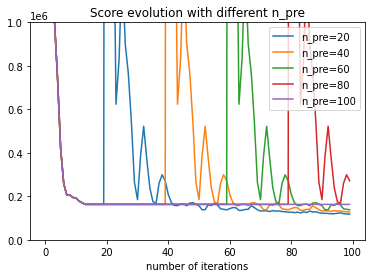

In [50]:
for i, n_pre in enumerate(list_pre):
    plt.plot([x for x in range(100)], list_data_pre[i], label='n_pre='+str(n_pre))
# Add a title and axis labels
plt.title('Score evolution with different n_pre')
plt.xlabel('number of iterations')
#plt.ylabel('y')

#for i in range(len(x)):
#    #plt.plot(x[i], mean0[i], 'b.')
 #   plt.plot(x[i], mean1[i], 'o',markersize=3,color='orange') 
  #  plt.plot(x[i], mean2[i], 'gv',markersize=3) 
plt.ylim(0, 1000000)
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
print(df.columns)


In [ ]:
data_charge = df["charge"].values
data_discharge = df["decharge"].values
data_score=df['best_score'].values
print(data_charge)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# i, j = 15 20
print(data_charge[0].shape)
print([np.mean(data_charge[:][t]-data_discharge[:][t]) for t in range(T)] )
print([np.std(data_charge[:][t]-data_discharge[:][t]) for t in range(T)] )

In [ ]:
plt.plot([x for x in range(len(data_charge))], data_score, label='Score evolution')

# Add a title and axis labels
plt.title('Mean SFW with wk = 2/(k+2)')
plt.xlabel('number of iterations')
#plt.ylabel('y')

#for i in range(len(x)):
#    #plt.plot(x[i], mean0[i], 'b.')
 #   plt.plot(x[i], mean1[i], 'o',markersize=3,color='orange') 
  #  plt.plot(x[i], mean2[i], 'gv',markersize=3) 

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(data_score)

In [ ]:

plt.plot(x, mean0, label='nk=10^0')
plt.plot(x, mean1, label='nk=10^1')
plt.plot(x, mean2, label='nk=10^2')

# Add a title and axis labels
plt.title('Mean SFW with wk = 2/(k+2)')
plt.xlabel('number of iterations')
#plt.ylabel('y')

plt.yscale('log')
plt.xscale('log')
plt.xlim((1, 10000))
plt.ylim((0.001, 100))

for i in range(len(x)):
    #plt.plot(x[i], mean0[i], 'b.')
    plt.plot(x[i], mean1[i], 'o',markersize=3,color='orange') 
    plt.plot(x[i], mean2[i], 'gv',markersize=3) 

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
#list_K=[x for x in range(200,201)]#,20)]
list_K=[50,100]
list_data=[]
for i,K in enumerate(list_K):
    x_bar_k,df=FW_solve(data,actual_time,analyse=True,K=K,nk=20)
    list_data.append(df['best_score'].values)
    print(list_data)
    

In [ ]:
for i,K in enumerate(list_K):
  plt.plot([x+1 for x in range(K)], list_data[i], label='Score evolution'+str(K))

# Add a title and axis labels
plt.title('Score with different K')
plt.xlabel('number of iterations')
#plt.ylabel('y')

#for i in range(len(x)):
#    #plt.plot(x[i], mean0[i], 'b.')
 #   plt.plot(x[i], mean1[i], 'o',markersize=3,color='orange') 
  #  plt.plot(x[i], mean2[i], 'gv',markersize=3) 

plt.yscale('log')
plt.xscale('log')
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
#list_nk=[x for x in range(10,120,20)]
list_nk=[1,10,20,30]
list_data_nk=[]
K=50
for i,nk in enumerate(list_nk):
    x_bar_k,df=FW_solve(data,actual_time,analyse=True,K=K,nk=nk)
    list_data_nk.append(df['best_score'].values)

In [ ]:
for i,nk in enumerate(list_nk):
  plt.plot([x+1 for x in range(K)], list_data_nk[i], label='nk='+str(nk))

# Add a title and axis labels
plt.title('Evolution de la valeur objective pour different valeur de nk')
plt.xlabel('number of iterations')
#plt.ylabel('y')

#for i in range(len(x)):
#    #plt.plot(x[i], mean0[i], 'b.')
 #   plt.plot(x[i], mean1[i], 'o',markersize=3,color='orange') 
  #  plt.plot(x[i], mean2[i], 'gv',markersize=3) 

plt.yscale('log')
plt.xscale('log')
plt.ylabel('objective value')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
plt.plot([x+1 for x in range(T)], df['soc'][1][0], label='soc evolution')


In [ ]:
print([np.mean(df['soc'], axis=0) ])
#print([np.std(data_charge[:][t]-data_discharge[:][t]) for t in range(T)] )